<h1> Battle of the Neighbourhoods </h1>

<h2>This data includes both the introduction, anlaysis & report</h2>

<h3>Week4: Criteria </h3>
<h4>Required to submit the following: </h4>

- A description of the problem and a discussion of the background. (15 marks)
- A description of the data and how it will be used to solve the problem. (15 marks)
- Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M,

<h4> 1. Problem/Discussion Background </h4>

My assessment will cover multiple areas in analyzing the data across the Neighbourhoods of Toronto, Canada and Melbourne, Australia. The objective of this task is too dig deep onto what location is safer, and best choice of residence, analyzing and pulling data from applications like foursquare, wikipedia and other potential other websites for validation. By the end of this notebook, I will have;
- defined the situation, backgorund, objectives
- description of the data to be used, how it will be used and other supporting information which will support week 5 of this lab. 

Situation: I've recived a job offer to a new company on the other side of the world, Toronto, Canada. This role comes with great career prospects, opporunties and a pay increase to big to not consider. Before transition and acceptance, I need to assess the location I want to move, saftey of it's neighborhood, and more to come to my decision. 

Background: I live by the beaches of Melbourne, Australia, where the neighborhood is quie, safe, has great amenities, cafes, parks and more. Pharamacies are nearby, schools, overall a great place to raise children. Given the distance between the offer and current residence, I would either need to decline the offer or move abroad. 

Objective: To relocate I need to find a simular neighborhood with much to offer.

Current assessments have been completed about Tornto through Week3 this of this lab, looking at postal codes, analyzing clusters in and around Toronto and comparing it to Melbourne. This assessment will be a continuation, looking into more innovative ways to assess viability and creativity of analysis skills acquired throughout the data science course. 

<h4> 2. Data Solving the Problems </h4>

To analyse the neighhbourhoods I will use the following data sources;
- Pulling data from Toronto neighbourhoods using the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M,
- Using the foursquare web application to access locations, tips, and options in particular neighbourhoods https://foursquare.com/
- Using online resources to understand saftey within the top rated neighbourhoods
    - there is a crime map available on https://data.torontopolice.on.ca/pages/maps
- Using for housing prices 
- Additional city data can be found https://www.toronto.ca/city-government/data-research-maps/toronto-economy-labour-force-demographics/ where I can anlayse 
    - property
    - income
Additional data may be used throughout to help validate research. 

Useability: To use this data, I will be conducting the following activties;
 - Pulling data from an API extract within Python
 - Clean data to narrow specific demogrpahics
 - Wraggle data to fit into graphs and charts for better analysis
 - Create dataframs to store new data that cannot be pulled from online sources
 - Rate data on importance 

Once I have a complete dataset, I will analyse and make a decision if I shall move or not move. Weighing out the pros/cons in a statistical and analytical manner. 

...

<h3> 1. Importing Analysis Liabraries </h3>

In [1]:
#install beautiful soup to load HTML / WIki information
! pip install BeautifulSoup4
#install geopy for graphing 
!conda install -c conda-forge geopy --yes

     |████████████████████████████████| 122kB 3.2MB/s eta 0:00:01
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    openssl-1.1.1j             |       h7f98852_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0

The following packages

In [2]:
# import all & potential liabaries to be used in this lab
import pandas as pd
import numpy as np # library to handle data in a vectorized manner

import requests # library to handle requests on extracting online data
from bs4 import BeautifulSoup #import html file, for wiki
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranforming json file into a pandas dataframe library

import os
from sklearn.cluster import KMeans # for clustering data
import folium  # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
print('Libraries have been imported sucessfully.')

Folium installed
Libraries have been imported sucessfully.


<h3> 2. Importing DataSets </h3>

<h4> 2.1. Importing & Light clean of data from Wiki (Neighbourhood Information in Toronto) </h4>

In [3]:
#Link wiki/ url path - to gather population /location of Toronto Data
WikiPath = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
datasource = requests.get(WikiPath).text
print('loaded source data form wikisite')

loaded source data form wikisite


In [4]:
#use beautiful soup to extract table data
soup = BeautifulSoup(datasource, "html.parser") #"html.parser" does not require parser tools
table=soup.find('table')
column_names=['Postalcode','Borough','Neighborhood']
wikdf = pd.DataFrame(columns=column_names)
wikdf

,Postalcode,Borough,Neighborhood


In [5]:
type(table)

bs4.element.Tag

In [6]:
for row in table.find_all('tr'):
    row_data=[]
    for cell in row.find_all('td'):
        row_data.append(cell.text.strip())
    if len(row_data)==3:
        wikdf.loc[len(wikdf)] = row_data
        wikdf.head()
wikdf

,Postalcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


In [7]:
#remove 'not assigned' from Borough set
wikdf=wikdf[wikdf['Borough']!='Not assigned']
wikdf

,Postalcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [7]:
wikdf.shape

(180, 3)

In [8]:
#get coordinatoes of places
geocorderwikdf=pd.read_csv('http://cocl.us/Geospatial_data')
geocorderwikdf.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [9]:
#merge two tables together
geocorderwikdf.rename(columns={'Postal Code':'Postalcode'},inplace=True)
geowikdf = pd.merge(geocorderwikdf, wikdf, on='Postalcode')

In [10]:
#dispay top 5 rows
geowikdf.head(5)

,Postalcode,Latitude,Longitude,Borough,Neighborhood
0,M1B,43.806686,-79.194353,Scarborough,"Malvern, Rouge"
1,M1C,43.784535,-79.160497,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,43.763573,-79.188711,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,43.770992,-79.216917,Scarborough,Woburn
4,M1H,43.773136,-79.239476,Scarborough,Cedarbrae


In [11]:
#group pairs in new DF
geowikdf2=geowikdf.groupby('Neighborhood')
#review output
geowikdf2.head()
#count amount of duplicates
geowikdf2['Neighborhood'].value_counts()

Neighborhood                                     Neighborhood                                   
Agincourt                                        Agincourt                                          1
Alderwood, Long Branch                           Alderwood, Long Branch                             1
Bathurst Manor, Wilson Heights, Downsview North  Bathurst Manor, Wilson Heights, Downsview North    1
Bayview Village                                  Bayview Village                                    1
Bedford Park, Lawrence Manor East                Bedford Park, Lawrence Manor East                  1
                                                                                                   ..
Willowdale, Willowdale West                      Willowdale, Willowdale West                        1
Woburn                                           Woburn                                             1
Woodbine Heights                                 Woodbine Heights                      

In [12]:
#drop duplicates
geowikdf.drop_duplicates(inplace=True) 
geowikdf

,Postalcode,Latitude,Longitude,Borough,Neighborhood
0,M1B,43.806686,-79.194353,Scarborough,"Malvern, Rouge"
1,M1C,43.784535,-79.160497,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,43.763573,-79.188711,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,43.770992,-79.216917,Scarborough,Woburn
4,M1H,43.773136,-79.239476,Scarborough,Cedarbrae
...,...,...,...,...,...
98,M9N,43.706876,-79.518188,York,Weston
99,M9P,43.696319,-79.532242,Etobicoke,Westmount
100,M9R,43.688905,-79.554724,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
101,M9V,43.739416,-79.588437,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


In [14]:
#import to map area
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    pandas-1.1.5               |   py36h284efc9_0        11.3 MB  conda-forge
    pytz-2020.5                |     pyhd8ed1ab_0         244 KB  conda-forge
    toolz-0.11.1               |             py_0          46 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
       

In [47]:
# define map centered around Toronto with a low zoom level - toronto coordinates 43.651070, -79.347015
torontomap = folium.Map(location=[43.651070, -79.347015], zoom_start=13)


# display TorontoMap
torontomap

In [14]:
# Toronto City latitude and longitude values 43.651070, -79.347015
T_latitude = 43.651070
T_longitude = -79.347015
print(T_latitude, T_longitude)

43.65107 -79.347015


In [48]:
# instantiate a feature group for the neighborhoods in the dataframe Latitude	Longitude	
neighborhoods2 = folium.map.FeatureGroup()

# loop through list to add markings on the map
for lat, lng, in zip(geowikdf.Latitude, geowikdf.Longitude):
    neighborhoods2.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='pink',
            fill_opacity=0.6
        )
    )

# add to map
torontomap.add_child(neighborhoods2)

In [16]:
# instantiate a feature group for the neighborhoods in the dataframe Latitude	Longitude	
neighborhoods5 = folium.map.FeatureGroup()

# loop through list to add markings on the map
for lat, lng, in zip(geowikdf.Latitude, geowikdf.Longitude):
    neighborhoods5.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='pink',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(geowikdf.Latitude)
longitudes = list(geowikdf.Longitude)
labels = geowikdf.Postalcode

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(torontomap)
    
# add to map
torontomap.add_child(neighborhoods5)

<H2> Neighborhood Saftey </H2>
<h3>Based on the map, there is an abundance of neighbourhoods to analyse and breakdown. A key component to narrowing the search is the safety of the area. Here I will investigate crime rates in Toronto through available data online</h3>

In [17]:
#data of saftey found online
PoliceDataPath2="https://services.arcgis.com/S9th0jAJ7bqgIRjw/arcgis/rest/services/Neighbourhood_MCI/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json"

In [18]:
#Pulling data into a json file
datasource3 = requests.get(PoliceDataPath2).json()
datasource3

{'objectIdFieldName': 'OBJECTID',
 'uniqueIdField': {'name': 'OBJECTID', 'isSystemMaintained': True},
 'globalIdFieldName': '',
 'geometryProperties': {'shapeAreaFieldName': 'Shape__Area',
  'shapeLengthFieldName': 'Shape__Length',
  'units': 'esriMeters'},
 'geometryType': 'esriGeometryPolygon',
 'spatialReference': {'wkid': 4326, 'latestWkid': 4326},
 'fields': [{'name': 'OBJECTID',
   'type': 'esriFieldTypeOID',
   'alias': 'OBJECTID',
   'sqlType': 'sqlTypeOther',
   'domain': None,
   'defaultValue': None},
  {'name': 'Neighbourhood',
   'type': 'esriFieldTypeString',
   'alias': 'Neighbourhood',
   'sqlType': 'sqlTypeOther',
   'length': 300,
   'domain': None,
   'defaultValue': None},
  {'name': 'Hood_ID',
   'type': 'esriFieldTypeString',
   'alias': 'Hood_ID',
   'sqlType': 'sqlTypeOther',
   'length': 10,
   'domain': None,
   'defaultValue': None},
  {'name': 'Population',
   'type': 'esriFieldTypeInteger',
   'alias': 'Population',
   'sqlType': 'sqlTypeOther',
   'domain'

In [19]:
# assign relevant part of JSON to venues - there was several objects to select, and this was an incrementive process
data6 = datasource3['features']

# tranform json file into a dataframe
NHSafteyData = json_normalize(data6)
NHSafteyData.head(2)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,attributes.OBJECTID,attributes.Neighbourhood,attributes.Hood_ID,attributes.Population,attributes.Assault_2014,attributes.Assault_2015,attributes.Assault_2016,attributes.Assault_2017,attributes.Assault_2018,attributes.Assault_2019,...,attributes.TheftOver_2016,attributes.TheftOver_2017,attributes.TheftOver_2018,attributes.TheftOver_2019,attributes.TheftOver_AVG,attributes.TheftOver_CHG,attributes.TheftOver_Rate_2019,attributes.Shape__Area,attributes.Shape__Length,geometry.rings
0,1,Yonge-St.Clair,097,12528,20,29,39,27,34,37,...,8,0,3,6,4.3,1.00,47.9,1.161315e+06,5873.270582,"[[[-79.3911544450554, 43.6810810205658], [-79...."
1,2,York University Heights,027,27593,271,296,361,344,357,370,...,37,39,38,28,36.3,-0.26,101.5,1.324666e+07,18504.777326,"[[[-79.5052468371003, 43.7598739861204], [-79...."


In [20]:
NHSafteyData.dtypes

attributes.OBJECTID                 int64
attributes.Neighbourhood           object
attributes.Hood_ID                 object
attributes.Population               int64
attributes.Assault_2014             int64
                                   ...   
attributes.TheftOver_CHG          float64
attributes.TheftOver_Rate_2019    float64
attributes.Shape__Area            float64
attributes.Shape__Length          float64
geometry.rings                     object
Length: 61, dtype: object

In [21]:
#assess dimensions of file
NHSafteyData.shape

(140, 61)

In [22]:
NHSafteyData.columns

Index(['attributes.OBJECTID', 'attributes.Neighbourhood', 'attributes.Hood_ID',
       'attributes.Population', 'attributes.Assault_2014',
       'attributes.Assault_2015', 'attributes.Assault_2016',
       'attributes.Assault_2017', 'attributes.Assault_2018',
       'attributes.Assault_2019', 'attributes.Assault_AVG',
       'attributes.Assault_CHG', 'attributes.Assault_Rate_2019',
       'attributes.AutoTheft_2014', 'attributes.AutoTheft_2015',
       'attributes.AutoTheft_2016', 'attributes.AutoTheft_2017',
       'attributes.AutoTheft_2018', 'attributes.AutoTheft_2019',
       'attributes.AutoTheft_AVG', 'attributes.AutoTheft_CHG',
       'attributes.AutoTheft_Rate_2019', 'attributes.BreakandEnter_2014',
       'attributes.BreakandEnter_2015', 'attributes.BreakandEnter_2016',
       'attributes.BreakandEnter_2017', 'attributes.BreakandEnter_2018',
       'attributes.BreakandEnter_2019', 'attributes.BreakandEnter_AVG',
       'attributes.BreakandEnter_CHG', 'attributes.BreakandEnter

In [23]:
#clean columns not relevant to mysearch of neighborhood safety
NHSafteyData.drop(['attributes.OBJECTID', 'attributes.Hood_ID','attributes.Assault_CHG','attributes.AutoTheft_CHG','attributes.BreakandEnter_CHG','attributes.Homicide_CHG','attributes.Robbery_CHG','attributes.TheftOver_CHG','attributes.Shape__Area',
       'attributes.Shape__Length'
                   ],axis=1, inplace=True)
NHSafteyData.head(2)

,attributes.Neighbourhood,attributes.Population,attributes.Assault_2014,attributes.Assault_2015,attributes.Assault_2016,attributes.Assault_2017,attributes.Assault_2018,attributes.Assault_2019,attributes.Assault_AVG,attributes.Assault_Rate_2019,...,attributes.Robbery_Rate_2019,attributes.TheftOver_2014,attributes.TheftOver_2015,attributes.TheftOver_2016,attributes.TheftOver_2017,attributes.TheftOver_2018,attributes.TheftOver_2019,attributes.TheftOver_AVG,attributes.TheftOver_Rate_2019,geometry.rings
0,Yonge-St.Clair,12528,20,29,39,27,34,37,31.0,295.3,...,31.9,4,5,8,0,3,6,4.3,47.9,"[[[-79.3911544450554, 43.6810810205658], [-79...."
1,York University Heights,27593,271,296,361,344,357,370,333.2,1340.9,...,286.3,30,46,37,39,38,28,36.3,101.5,"[[[-79.5052468371003, 43.7598739861204], [-79...."


In [24]:
NHSafteyData.rename(columns={'attributes.Neighbourhood':'Neighborhood', 'attributes.Population':'Population', 'attributes.Assault_2014':'Assault_2014',
                                           'attributes.Assault_2015':'Assault_2015', 'attributes.Assault_2016':'Assault_2016','attributes.Assault_2017':'Assault_2017', 
                                           'attributes.Assault_2018':'Assault_2018', 'attributes.Assault_2019':'Assault_2019', 'attributes.Assault_AVG':'Assault_AVG',
                                           'attributes.Assault_Rate_2019':'Assault_Rate_2019','attributes.AutoTheft_2014':'AutoTheft_2014', 'attributes.AutoTheft_2015':'AutoTheft_2015',
                                           'attributes.AutoTheft_2016':'AutoTheft_2016', 'attributes.AutoTheft_2017':'AutoTheft_2017','attributes.AutoTheft_2018':'AutoTheft_2018', 
                                           'attributes.AutoTheft_2019':'AutoTheft_2019','attributes.AutoTheft_AVG':'AutoTheft_AVG', 'attributes.AutoTheft_Rate_2019':'AutoTheft_Rate_2019',
                                           'attributes.BreakandEnter_2014':'BreakandEnter_2014','attributes.BreakandEnter_2015':'BreakandEnter_2015', 'attributes.BreakandEnter_2016':'BreakandEnter_2016',
                                           'attributes.BreakandEnter_2017':'BreakandEnter_2017', 'attributes.BreakandEnter_2018':'BreakandEnter_2018','attributes.BreakandEnter_2019':'BreakandEnter_2019',
                                           'attributes.BreakandEnter_AVG':'BreakandEnter_AVG','attributes.BreakandEnter_Rate_2019':'BreakandEnter_Rate_2019','attributes.Homicide_2014':'Homicide_2014',
                                           'attributes.Homicide_2015':'Homicide_2015','attributes.Homicide_2016':'Homicide_2016', 'attributes.Homicide_2017':'Homicide_2017',
                                           'attributes.Homicide_2018':'Homicide_2018', 'attributes.Homicide_2019':'Homicide_2019','attributes.Homicide_AVG':'Homicide_AVG',
                                           'attributes.Homicide_Rate_2019':'Homicide_Rate_2019', 'attributes.Robbery_2014':'Robbery_2014','attributes.Robbery_2015':'Robbery_2015', 
                                           'attributes.Robbery_2016':'Robbery_2016','attributes.Robbery_2017':'Robbery_2017', 'attributes.Robbery_2018':'Robbery_2018','attributes.Robbery_2019':'Robbery_2019',
                                           'attributes.Robbery_AVG':'Robbery_AVG','attributes.Robbery_Rate_2019':'Robbery_Rate_2019','attributes.TheftOver_2014':'TheftOver_2014', 'attributes.TheftOver_2015':'heftOver_2015',
                                           'attributes.TheftOver_2016':'TheftOver_2016', 'attributes.TheftOver_2017':'TheftOver_2017','attributes.TheftOver_2018':'TheftOver_2018', 'attributes.TheftOver_2019':'TheftOver_2019',
                                           'attributes.TheftOver_AVG':'TheftOver_AVG', 'attributes.TheftOver_Rate_2019':'TheftOver_Rate_2019', 'geometry.rings':'geometry.location'
                                          }, inplace=True)


In [25]:
NHSafteyData.head(2)

,Neighborhood,Population,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,Assault_2019,Assault_AVG,Assault_Rate_2019,...,Robbery_Rate_2019,TheftOver_2014,heftOver_2015,TheftOver_2016,TheftOver_2017,TheftOver_2018,TheftOver_2019,TheftOver_AVG,TheftOver_Rate_2019,geometry.location
0,Yonge-St.Clair,12528,20,29,39,27,34,37,31.0,295.3,...,31.9,4,5,8,0,3,6,4.3,47.9,"[[[-79.3911544450554, 43.6810810205658], [-79...."
1,York University Heights,27593,271,296,361,344,357,370,333.2,1340.9,...,286.3,30,46,37,39,38,28,36.3,101.5,"[[[-79.5052468371003, 43.7598739861204], [-79...."


In [26]:
NHSafteyData.describe()

,Population,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,Assault_2019,Assault_AVG,Assault_Rate_2019,AutoTheft_2014,...,Robbery_AVG,Robbery_Rate_2019,TheftOver_2014,heftOver_2015,TheftOver_2016,TheftOver_2017,TheftOver_2018,TheftOver_2019,TheftOver_AVG,TheftOver_Rate_2019
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,19511.221429,117.350000,126.885714,132.200000,134.607143,138.935714,145.900000,132.646429,714.346429,24.835714,...,25.647143,122.813571,7.071429,7.328571,7.321429,8.314286,8.764286,9.678571,8.082857,47.132143
std,10033.589222,106.968961,119.613531,126.501014,137.168053,142.883824,148.500529,128.977375,498.301136,30.548843,...,23.220601,86.312788,8.409179,9.228859,9.023764,9.708771,10.936449,11.918348,9.427947,41.478434
min,6577.000000,16.000000,12.000000,10.000000,20.000000,15.000000,17.000000,18.500000,161.100000,1.000000,...,3.300000,7.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.200000,0.000000
25%,12019.500000,53.750000,57.250000,57.500000,58.750000,58.750000,62.000000,59.425000,392.300000,10.000000,...,11.675000,70.350000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.500000,22.750000
50%,16749.500000,85.000000,92.000000,97.000000,94.000000,93.500000,99.500000,96.500000,592.600000,17.500000,...,20.100000,104.200000,5.000000,5.000000,4.500000,5.000000,5.000000,6.000000,5.200000,37.400000
75%,23854.500000,141.250000,152.250000,166.250000,159.500000,167.500000,172.000000,160.200000,875.675000,29.250000,...,30.400000,148.575000,8.000000,8.000000,8.000000,10.000000,10.000000,10.250000,8.350000,54.650000
max,65913.000000,738.000000,826.000000,888.000000,905.000000,910.000000,916.000000,851.800000,3550.800000,305.000000,...,135.700000,668.100000,54.000000,58.000000,59.000000,58.000000,59.000000,73.000000,56.200000,283.000000


In [27]:
#setting neighborhood to index to apply iloc methods in analysis
NHSafteyData.set_index('Neighborhood', inplace=True)

In [28]:
NHSafteyData.head(2)

,Population,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,Assault_2019,Assault_AVG,Assault_Rate_2019,AutoTheft_2014,...,Robbery_Rate_2019,TheftOver_2014,heftOver_2015,TheftOver_2016,TheftOver_2017,TheftOver_2018,TheftOver_2019,TheftOver_AVG,TheftOver_Rate_2019,geometry.location
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Yonge-St.Clair,12528,20,29,39,27,34,37,31.0,295.3,2,...,31.9,4,5,8,0,3,6,4.3,47.9,"[[[-79.3911544450554, 43.6810810205658], [-79...."
York University Heights,27593,271,296,361,344,357,370,333.2,1340.9,105,...,286.3,30,46,37,39,38,28,36.3,101.5,"[[[-79.5052468371003, 43.7598739861204], [-79...."


In [29]:
NHSafteyData.columns

Index(['Population', 'Assault_2014', 'Assault_2015', 'Assault_2016',
       'Assault_2017', 'Assault_2018', 'Assault_2019', 'Assault_AVG',
       'Assault_Rate_2019', 'AutoTheft_2014', 'AutoTheft_2015',
       'AutoTheft_2016', 'AutoTheft_2017', 'AutoTheft_2018', 'AutoTheft_2019',
       'AutoTheft_AVG', 'AutoTheft_Rate_2019', 'BreakandEnter_2014',
       'BreakandEnter_2015', 'BreakandEnter_2016', 'BreakandEnter_2017',
       'BreakandEnter_2018', 'BreakandEnter_2019', 'BreakandEnter_AVG',
       'BreakandEnter_Rate_2019', 'Homicide_2014', 'Homicide_2015',
       'Homicide_2016', 'Homicide_2017', 'Homicide_2018', 'Homicide_2019',
       'Homicide_AVG', 'Homicide_Rate_2019', 'Robbery_2014', 'Robbery_2015',
       'Robbery_2016', 'Robbery_2017', 'Robbery_2018', 'Robbery_2019',
       'Robbery_AVG', 'Robbery_Rate_2019', 'TheftOver_2014', 'heftOver_2015',
       'TheftOver_2016', 'TheftOver_2017', 'TheftOver_2018', 'TheftOver_2019',
       'TheftOver_AVG', 'TheftOver_Rate_2019', 'geometry

In [30]:
# Create a list of total crime rates from 2014-2019
years = list(map(str, range(2014,2020)))
years

['2014', '2015', '2016', '2017', '2018', '2019']

In [34]:
#create total column of the counts of crimes
sum_column=NHSafteyData['Assault_AVG']+NHSafteyData['BreakandEnter_AVG']+NHSafteyData['Homicide_AVG']+NHSafteyData['Robbery_AVG']+NHSafteyData['TheftOver_AVG']
NHSafteyData["Avg_Total_Crime"] = sum_column
NHSafteyData.head(2)

,Population,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,Assault_2019,Assault_AVG,Assault_Rate_2019,AutoTheft_2014,...,TheftOver_2014,heftOver_2015,TheftOver_2016,TheftOver_2017,TheftOver_2018,TheftOver_2019,TheftOver_AVG,TheftOver_Rate_2019,geometry.location,Avg_Total_Crime
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Yonge-St.Clair,12528,20,29,39,27,34,37,31.0,295.3,2,...,4,5,8,0,3,6,4.3,47.9,"[[[-79.3911544450554, 43.6810810205658], [-79....",64.3
York University Heights,27593,271,296,361,344,357,370,333.2,1340.9,105,...,30,46,37,39,38,28,36.3,101.5,"[[[-79.5052468371003, 43.7598739861204], [-79....",559.3


In [35]:
NHSafteyData.columns

Index(['Population', 'Assault_2014', 'Assault_2015', 'Assault_2016',
       'Assault_2017', 'Assault_2018', 'Assault_2019', 'Assault_AVG',
       'Assault_Rate_2019', 'AutoTheft_2014', 'AutoTheft_2015',
       'AutoTheft_2016', 'AutoTheft_2017', 'AutoTheft_2018', 'AutoTheft_2019',
       'AutoTheft_AVG', 'AutoTheft_Rate_2019', 'BreakandEnter_2014',
       'BreakandEnter_2015', 'BreakandEnter_2016', 'BreakandEnter_2017',
       'BreakandEnter_2018', 'BreakandEnter_2019', 'BreakandEnter_AVG',
       'BreakandEnter_Rate_2019', 'Homicide_2014', 'Homicide_2015',
       'Homicide_2016', 'Homicide_2017', 'Homicide_2018', 'Homicide_2019',
       'Homicide_AVG', 'Homicide_Rate_2019', 'Robbery_2014', 'Robbery_2015',
       'Robbery_2016', 'Robbery_2017', 'Robbery_2018', 'Robbery_2019',
       'Robbery_AVG', 'Robbery_Rate_2019', 'TheftOver_2014', 'heftOver_2015',
       'TheftOver_2016', 'TheftOver_2017', 'TheftOver_2018', 'TheftOver_2019',
       'TheftOver_AVG', 'TheftOver_Rate_2019', 'geometry

In [36]:
#pull put the highest crime places
NHSafteyData.sort_values(["Avg_Total_Crime"], ascending=False, axis=0, inplace=True)
NHSafteyData.head(2)

#get the top 5 entries into new dataframe
HighestCrimeRates = NHSafteyData.head(10)
HighestCrimeRates.head()

,Population,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,Assault_2019,Assault_AVG,Assault_Rate_2019,AutoTheft_2014,...,TheftOver_2014,heftOver_2015,TheftOver_2016,TheftOver_2017,TheftOver_2018,TheftOver_2019,TheftOver_AVG,TheftOver_Rate_2019,geometry.location,Avg_Total_Crime
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Waterfront Communities-The Island,65913,738,826,888,905,910,844,851.8,1280.5,57,...,46,48,59,52,59,73,56.2,110.8,"[[[-79.3769345412503, 43.6468844174038], [-79....",1238.5
Bay Street Corridor,25797,593,730,727,852,808,916,771.0,3550.8,22,...,54,43,41,49,54,73,52.3,283.0,"[[[-79.3874764917872, 43.6506725749373], [-79....",1104.8
Church-Yonge Corridor,31340,480,495,543,694,766,879,642.8,2804.7,31,...,32,16,40,30,43,42,33.8,134.0,"[[[-79.3766770145865, 43.6624187091318], [-79....",1002.8
Moss Park,20506,343,406,473,446,543,637,474.7,3106.4,25,...,6,14,12,21,35,25,18.8,121.9,"[[[-79.3517014784919, 43.6555653647593], [-79....",770.0
Kensington-Chinatown,17945,318,339,340,416,423,373,368.2,2078.6,21,...,18,34,18,27,26,37,26.7,206.2,"[[[-79.4039708353294, 43.6471873351369], [-79....",611.2


In [37]:
#pull put the lowest crime places
NHSafteyData.sort_values(['Avg_Total_Crime'], ascending=True, axis=0, inplace=True)
NHSafteyData.head(5)

#get the top 5 entries into new dataframe
LowestCrimeRates = NHSafteyData.head(10)
LowestCrimeRates.head()

,Population,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,Assault_2019,Assault_AVG,Assault_Rate_2019,AutoTheft_2014,...,TheftOver_2014,heftOver_2015,TheftOver_2016,TheftOver_2017,TheftOver_2018,TheftOver_2019,TheftOver_AVG,TheftOver_Rate_2019,geometry.location,Avg_Total_Crime
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Lambton Baby Point,7985,31,45,25,29,29,27,31.0,338.1,8,...,0,2,2,0,2,1,1.2,12.5,"[[[-79.5054852060837, 43.6628066642284], [-79....",50.0
Maple Leaf,10111,23,33,45,26,37,31,32.5,306.6,8,...,0,5,0,3,4,4,2.7,39.6,"[[[-79.4924504221197, 43.7200975692162], [-79....",53.1
Markland Wood,10554,23,12,24,24,24,17,20.7,161.1,8,...,3,2,2,1,2,3,2.2,28.4,"[[[-79.5595481377089, 43.6362384264291], [-79....",56.5
Woodbine-Lumsden,7865,45,37,33,32,37,30,35.7,381.4,2,...,2,3,6,0,3,4,3.0,50.9,"[[[-79.3173917657424, 43.6964443178647], [-79....",60.4
Lawrence Park North,14607,27,25,22,34,20,38,27.7,260.1,22,...,4,5,3,5,4,4,4.2,27.4,"[[[-79.3900360934561, 43.7276830090765], [-79....",62.4


In [38]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.3


In [39]:
# let's quickly view the 2013 data
LowestCrimeRates['Avg_Total_Crime'].head()

Neighborhood
Lambton Baby Point     50.0
Maple Leaf             53.1
Markland Wood          56.5
Woodbine-Lumsden       60.4
Lawrence Park North    62.4
Name: Avg_Total_Crime, dtype: float64

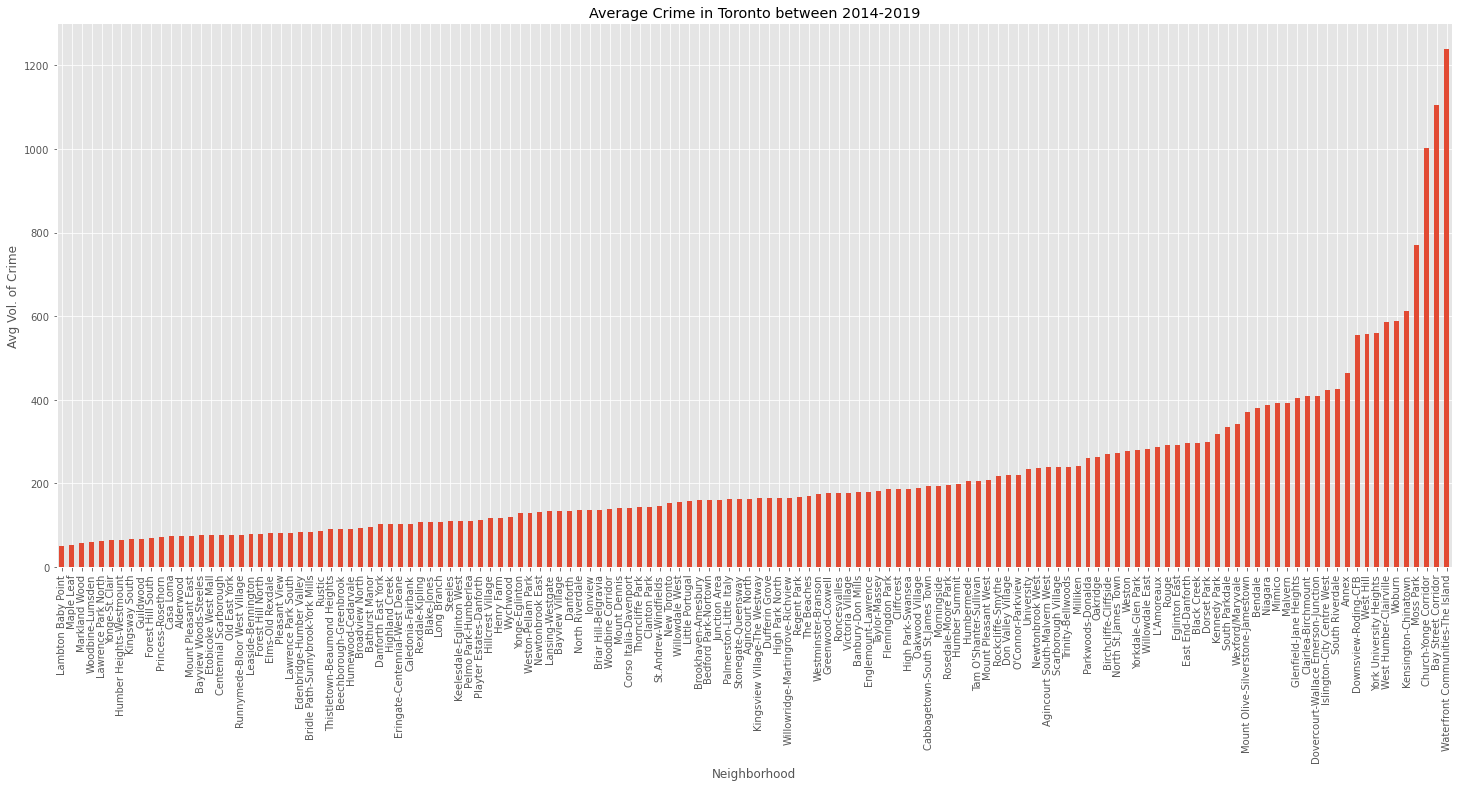

In [40]:
# step 2: plot data
NHSafteyData['Avg_Total_Crime'].plot(kind='bar', figsize=(25, 10))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Avg Vol. of Crime') # add y-label to the plot
plt.title('Average Crime in Toronto between 2014-2019') # add title to the plot

plt.show()

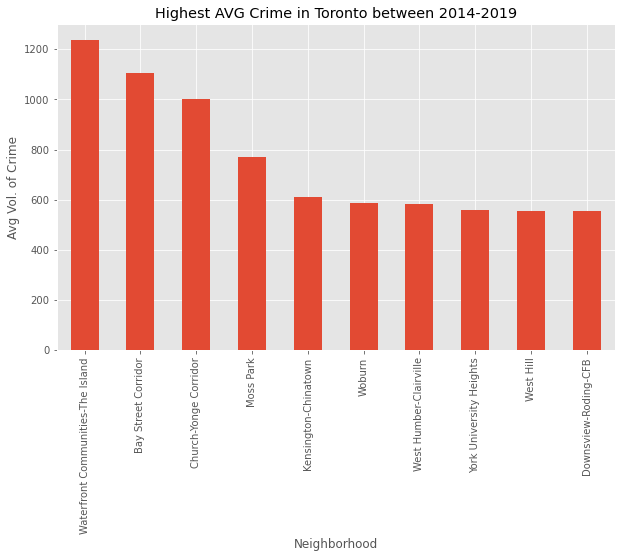

In [41]:
# step 3: plot data
HighestCrimeRates['Avg_Total_Crime'].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Avg Vol. of Crime') # add y-label to the plot
plt.title('Highest AVG Crime in Toronto between 2014-2019') # add title to the plot

plt.show()

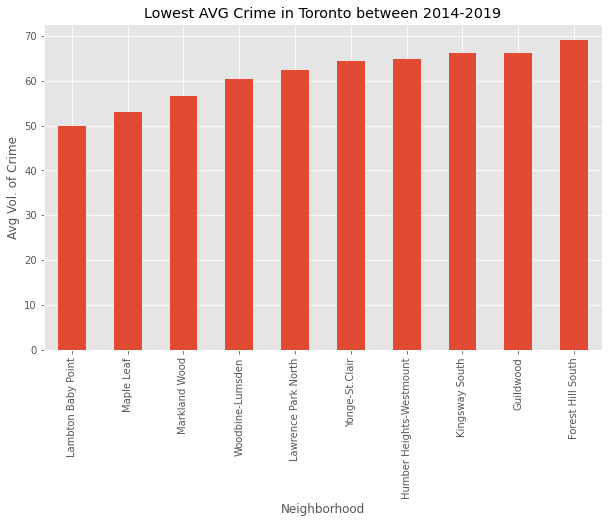

In [42]:
# step 2: plot data
LowestCrimeRates['Avg_Total_Crime'].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Avg Vol. of Crime') # add y-label to the plot
plt.title('Lowest AVG Crime in Toronto between 2014-2019') # add title to the plot

plt.show()

In [43]:
# initialize list of lists 
LowestCrimeDataPlot = [['Lambton Baby Point',-79.5054852060837, 43.6628066642284 ], ['Maple Leaf ', -79.4924504221197, 43.7200975692162],
        ['Markland Wood', -79.5595481377089, 43.6362384264291],['Woodbine-Lumsden', -79.3173917657424, 43.6964443178647],
        ['Lawrence Park North', -79.3900360934561, 43.7276830090765],['Yonge-St.Clair', -79.3911544450554, 43.6810810205658], 
        ['Humber Heights-Westmount ', -79.5132503493552, 43.6933857371299], ['Kingsway South', -79.5169887067604, 43.6461119513162],
        ['Guildwood', -79.2112398105705, 43.7511301885202], ['Forest Hill South', -79.4255215039971, 43.7009932786434]]

# Create the pandas DataFrame 
LCDP=pd.DataFrame(LowestCrimeDataPlot, columns = ['Neighborhood', 'Long','Lat']) 
  
# print dataframe. 
LCDP

,Neighborhood,Long,Lat
0,Lambton Baby Point,-79.505485,43.662807
1,Maple Leaf,-79.492450,43.720098
2,Markland Wood,-79.559548,43.636238
3,Woodbine-Lumsden,-79.317392,43.696444
4,Lawrence Park North,-79.390036,43.727683
5,Yonge-St.Clair,-79.391154,43.681081
6,Humber Heights-Westmount,-79.513250,43.693386
7,Kingsway South,-79.516989,43.646112
8,Guildwood,-79.211240,43.751130
9,Forest Hill South,-79.425522,43.700993


In [44]:
type(LCDP)

pandas.core.frame.DataFrame

In [49]:
# instantiate a feature group for the neighborhoods in the dataframe Latitude	Longitude	
LCDP2 = folium.map.FeatureGroup()

# loop through list to add markings on the map
for lat, lng, in zip(LCDP.Lat, LCDP.Long):
    LCDP2.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='pink',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(LCDP.Lat)
longitudes = list(LCDP.Long)
labels = LCDP.Neighborhood

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(torontomap)
    
# add to map
torontomap.add_child(LCDP2)

<H2> Melbourne Crime Comparrision</H2>
<h4> Here I will compare Saftey in Melbourne to Toronto. First I need to clean the Melbourne dataset to make it ready </h4>

In [50]:
#Link wiki/ url path - to gather population /location of Toronto Data
WikiPath3 = "https://en.wikipedia.org/wiki/Crime_in_Victoria#:~:text=7%20April%202020.-,Melbourne,the%205th%20safest%20city%20globally.&text=The%20recorded%20homicide%20rate%20of%20Melbourne%20was%202.2%20per%20100%2C000%20in%202018."
datasource3 = requests.get(WikiPath3).text
print('loaded source data form wikisite')

loaded source data form wikisite


In [51]:
#use beautiful soup to extract table data on wiki
soup3 = BeautifulSoup(datasource3, "html.parser") #"html.parser" does not require parser tools
table3=soup3.find("table", {"class": "wikitable"})
column_names3=['Type','2014','2015','2016','2017','2018']
wikdf3 = pd.DataFrame(columns=column_names3)
wikdf3

,Type,2014,2015,2016,2017,2018


In [52]:
for row in table3.find_all('tr'):
    row_data=[]
    for cell in row.find_all('td'):
        row_data.append(cell.text.strip())
    if len(row_data)==6:
        wikdf3.loc[len(wikdf3)] = row_data
        wikdf3.head()
wikdf3

,Type,2014,2015,2016,2017,2018
0,Homicide and related offences,3.3,2.9,3.2,3.9,2.2
1,Assault and related offences,634.9,629.2,689.3,685.6,677.1
2,Sexual offences,180.5,199.6,199.8,230.2,219.4
3,Abduction related offences,11.0,12.0,13.0,11.8,11.1
4,Robbery,43.1,41.8,49.7,50.9,48.0
5,Blackmail/extortion,3.5,3.8,3.2,3.0,3.5
6,"Stalking, harassment and threatening behaviour",186.6,200.4,205.0,186.3,182.8
7,Burglary/Break and enter,776.1,790.4,877.6,775.2,651.9
8,Theft,2527.0,2632.7,3018.3,2704.4,2600.4
9,Drug offences (total),431.5,494.3,491.8,461.3,473.4


In [53]:
wikdf3.set_index('Type', inplace=True)

In [54]:
wikdf3.describe()

,2014,2015,2016,2017,2018
count,10,10,10,10,10
unique,10,10,9,10,10
top,634.9,12.0,3.2,3.0,48.0
freq,1,1,2,1,1


In [55]:
wikdf3['Total'] = wikdf3.sum(axis=1)

In [56]:
wikdf3

,2014,2015,2016,2017,2018,Total
Type,,,,,,
Homicide and related offences,3.3,2.9,3.2,3.9,2.2,3.32.93.23.92.2
Assault and related offences,634.9,629.2,689.3,685.6,677.1,634.9629.2689.3685.6677.1
Sexual offences,180.5,199.6,199.8,230.2,219.4,180.5199.6199.8230.2219.4
Abduction related offences,11.0,12.0,13.0,11.8,11.1,11.012.013.011.811.1
Robbery,43.1,41.8,49.7,50.9,48.0,43.141.849.750.948.0
Blackmail/extortion,3.5,3.8,3.2,3.0,3.5,3.53.83.23.03.5
"Stalking, harassment and threatening behaviour",186.6,200.4,205.0,186.3,182.8,186.6200.4205.0186.3182.8
Burglary/Break and enter,776.1,790.4,877.6,775.2,651.9,776.1790.4877.6775.2651.9
Theft,2527.0,2632.7,3018.3,2704.4,2600.4,2527.02632.73018.32704.42600.4


In [57]:
wikdf3.dtypes

2014     object
2015     object
2016     object
2017     object
2018     object
Total    object
dtype: object

In [58]:
wikdf3.columns.astype(str)

Index(['2014', '2015', '2016', '2017', '2018', 'Total'], dtype='object')

In [59]:
wikdf3.drop(['Total'], axis=1, inplace=True)

In [60]:
wikdf3['Total'] = wikdf3.astype(float).sum(axis=1)

In [61]:
wikdf3

,2014,2015,2016,2017,2018,Total
Type,,,,,,
Homicide and related offences,3.3,2.9,3.2,3.9,2.2,15.5
Assault and related offences,634.9,629.2,689.3,685.6,677.1,3316.1
Sexual offences,180.5,199.6,199.8,230.2,219.4,1029.5
Abduction related offences,11.0,12.0,13.0,11.8,11.1,58.9
Robbery,43.1,41.8,49.7,50.9,48.0,233.5
Blackmail/extortion,3.5,3.8,3.2,3.0,3.5,17.0
"Stalking, harassment and threatening behaviour",186.6,200.4,205.0,186.3,182.8,961.1
Burglary/Break and enter,776.1,790.4,877.6,775.2,651.9,3871.2
Theft,2527.0,2632.7,3018.3,2704.4,2600.4,13482.8


In [62]:
wikdf3 = wikdf3.transpose() 

In [63]:
wikdf3

Type,Homicide and related offences,Assault and related offences,Sexual offences,Abduction related offences,Robbery,Blackmail/extortion,"Stalking, harassment and threatening behaviour",Burglary/Break and enter,Theft,Drug offences (total)
2014,3.3,634.9,180.5,11.0,43.1,3.5,186.6,776.1,2527.0,431.5
2015,2.9,629.2,199.6,12.0,41.8,3.8,200.4,790.4,2632.7,494.3
2016,3.2,689.3,199.8,13.0,49.7,3.2,205.0,877.6,3018.3,491.8
2017,3.9,685.6,230.2,11.8,50.9,3.0,186.3,775.2,2704.4,461.3
2018,2.2,677.1,219.4,11.1,48.0,3.5,182.8,651.9,2600.4,473.4
Total,15.5,3316.1,1029.5,58.9,233.5,17,961.1,3871.2,13482.8,2352.3


In [64]:
wikdf3['Total'] = wikdf3.astype(float).sum(axis=1)

In [65]:
wikdf3.drop(['Total'], axis=0, inplace=True)

In [66]:
wikdf3

Type,Homicide and related offences,Assault and related offences,Sexual offences,Abduction related offences,Robbery,Blackmail/extortion,"Stalking, harassment and threatening behaviour",Burglary/Break and enter,Theft,Drug offences (total),Total
2014,3.3,634.9,180.5,11.0,43.1,3.5,186.6,776.1,2527.0,431.5,4797.5
2015,2.9,629.2,199.6,12.0,41.8,3.8,200.4,790.4,2632.7,494.3,5007.1
2016,3.2,689.3,199.8,13.0,49.7,3.2,205.0,877.6,3018.3,491.8,5550.9
2017,3.9,685.6,230.2,11.8,50.9,3.0,186.3,775.2,2704.4,461.3,5112.6
2018,2.2,677.1,219.4,11.1,48.0,3.5,182.8,651.9,2600.4,473.4,4869.8


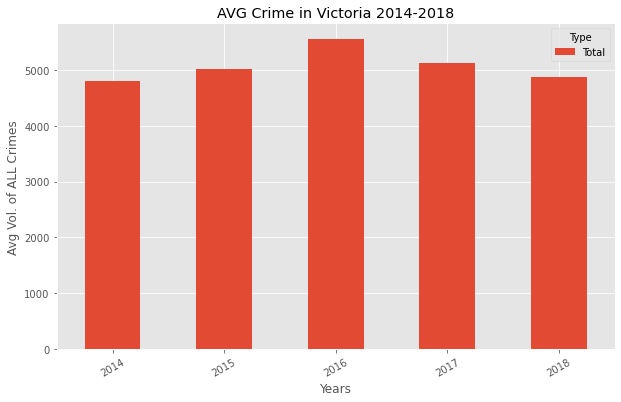

In [67]:
#PLot Victoria Data
wikdf3.plot(kind='bar', figsize=(10, 6))

# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=30, horizontalalignment="center")

plt.xlabel('Years') # add to x-label to the plot
plt.ylabel('Avg Vol. of ALL Crimes') # add y-label to the plot
plt.title('AVG Crime in Victoria 2014-2018') # add title to the plot

plt.show()

In [68]:
wikdf3.columns

Index(['Homicide and related offences', 'Assault and related offences',
       'Sexual offences', 'Abduction related offences', 'Robbery',
       'Blackmail/extortion', 'Stalking, harassment and threatening behaviour',
       'Burglary/Break and enter', 'Theft', 'Drug offences (total)', 'Total'],
      dtype='object', name='Type')

In [69]:
wikdf3

Type,Homicide and related offences,Assault and related offences,Sexual offences,Abduction related offences,Robbery,Blackmail/extortion,"Stalking, harassment and threatening behaviour",Burglary/Break and enter,Theft,Drug offences (total),Total
2014,3.3,634.9,180.5,11.0,43.1,3.5,186.6,776.1,2527.0,431.5,4797.5
2015,2.9,629.2,199.6,12.0,41.8,3.8,200.4,790.4,2632.7,494.3,5007.1
2016,3.2,689.3,199.8,13.0,49.7,3.2,205.0,877.6,3018.3,491.8,5550.9
2017,3.9,685.6,230.2,11.8,50.9,3.0,186.3,775.2,2704.4,461.3,5112.6
2018,2.2,677.1,219.4,11.1,48.0,3.5,182.8,651.9,2600.4,473.4,4869.8


In [71]:
wikdf3.drop(['Sexual offences','Abduction related offences','Blackmail/extortion','Stalking, harassment and threatening behaviour','Drug offences (total)'], axis=1, inplace=True)

In [73]:
wikdf3.head()

Type,Homicide and related offences,Assault and related offences,Robbery,Burglary/Break and enter,Theft,Total
2014,3.3,634.9,43.1,776.1,2527.0,4797.5
2015,2.9,629.2,41.8,790.4,2632.7,5007.1
2016,3.2,689.3,49.7,877.6,3018.3,5550.9
2017,3.9,685.6,50.9,775.2,2704.4,5112.6
2018,2.2,677.1,48.0,651.9,2600.4,4869.8


<h3>The next goal is to move the Toronto 'types of crimes' into the headers, remove the crimes not found in Victoria Data, append the years together, and leveraging a total's column so the data can better align with Victoria's Data</h3>

In [74]:
NHSafteyData.shape

(140, 51)

In [75]:
NHSafteyData = NHSafteyData.transpose() 

In [76]:
NHSafteyData3=NHSafteyData

In [77]:
NHSafteyData3

Neighborhood,Lambton Baby Point,Maple Leaf,Markland Wood,Woodbine-Lumsden,Lawrence Park North,Yonge-St.Clair,Humber Heights-Westmount,Kingsway South,Guildwood,Forest Hill South,...,Downsview-Roding-CFB,West Hill,York University Heights,West Humber-Clairville,Woburn,Kensington-Chinatown,Moss Park,Church-Yonge Corridor,Bay Street Corridor,Waterfront Communities-The Island
Population,7985,10111,10554,7865,14607,12528,10948,9271,9917,10732,...,35052,27392,27593,33312,53485,17945,20506,31340,25797,65913
Assault_2014,31,23,23,45,27,20,23,21,52,17,...,342,343,271,300,352,318,343,480,593,738
Assault_2015,45,33,12,37,25,29,33,30,38,12,...,364,395,296,310,395,339,406,495,730,826
Assault_2016,25,45,24,33,22,39,30,26,43,10,...,371,423,361,307,365,340,473,543,727,888
Assault_2017,29,26,24,32,34,27,31,20,41,27,...,421,400,344,307,400,416,446,694,852,905
Assault_2018,29,37,24,37,20,34,37,30,47,19,...,435,420,357,322,369,423,543,766,808,910
Assault_2019,27,31,17,30,38,37,35,28,28,26,...,442,431,370,265,427,373,637,879,916,844
Assault_AVG,31,32.5,20.7,35.7,27.7,31,31.5,25.8,41.5,18.5,...,395.8,402,333.2,301.8,384.7,368.2,474.7,642.8,771,851.8
Assault_Rate_2019,338.1,306.6,161.1,381.4,260.1,295.3,319.7,302,282.3,242.3,...,1261,1573.5,1340.9,795.5,798.4,2078.6,3106.4,2804.7,3550.8,1280.5
AutoTheft_2014,8,8,8,2,22,2,25,17,2,4,...,101,24,105,305,46,21,25,31,22,57


In [78]:
#shift data by adding a total column to add year year and remove by neighborhood
NHSafteyData3['Total'] = NHSafteyData3.sum(axis=1)

In [79]:
NHSafteyData3.head()

Neighborhood,Lambton Baby Point,Maple Leaf,Markland Wood,Woodbine-Lumsden,Lawrence Park North,Yonge-St.Clair,Humber Heights-Westmount,Kingsway South,Guildwood,Forest Hill South,...,West Hill,York University Heights,West Humber-Clairville,Woburn,Kensington-Chinatown,Moss Park,Church-Yonge Corridor,Bay Street Corridor,Waterfront Communities-The Island,Total
Population,7985,10111,10554,7865,14607,12528,10948,9271,9917,10732,...,27392,27593,33312,53485,17945,20506,31340,25797,65913,2731571
Assault_2014,31,23,23,45,27,20,23,21,52,17,...,343,271,300,352,318,343,480,593,738,16429
Assault_2015,45,33,12,37,25,29,33,30,38,12,...,395,296,310,395,339,406,495,730,826,17764
Assault_2016,25,45,24,33,22,39,30,26,43,10,...,423,361,307,365,340,473,543,727,888,18508
Assault_2017,29,26,24,32,34,27,31,20,41,27,...,400,344,307,400,416,446,694,852,905,18845


In [80]:
NHSafteyData3.columns

Index(['Lambton Baby Point', 'Maple Leaf', 'Markland Wood', 'Woodbine-Lumsden',
       'Lawrence Park North', 'Yonge-St.Clair', 'Humber Heights-Westmount',
       'Kingsway South', 'Guildwood', 'Forest Hill South',
       ...
       'West Hill', 'York University Heights', 'West Humber-Clairville',
       'Woburn', 'Kensington-Chinatown', 'Moss Park', 'Church-Yonge Corridor',
       'Bay Street Corridor', 'Waterfront Communities-The Island', 'Total'],
      dtype='object', name='Neighborhood', length=141)

In [81]:
newDF = NHSafteyData3[['Total']].copy()

In [82]:
newDF

Neighborhood,Total
Population,2731571
Assault_2014,16429
Assault_2015,17764
Assault_2016,18508
Assault_2017,18845
Assault_2018,19451
Assault_2019,20426
Assault_AVG,18570.5
Assault_Rate_2019,100008
AutoTheft_2014,3477


In [83]:
Crimes=['Homicide', 'Assault','Robbery','Break and Enter','Theft'] 
newDF

Neighborhood,Total
Population,2731571
Assault_2014,16429
Assault_2015,17764
Assault_2016,18508
Assault_2017,18845
Assault_2018,19451
Assault_2019,20426
Assault_AVG,18570.5
Assault_Rate_2019,100008
AutoTheft_2014,3477


<H2> Bike Paths Near Neighboorhoods </H2>
<h3>Based on the map, there is an abundance of neighhbourohoods to analyse. A key component to narrowing the search is the sfatey of the area. Here I will investigate crime rates in Toronto</h3>

In [89]:
# Get the dataset metadata by passing package_id to the package_search endpoint
# For example, to retrieve the metadata for this dataset:

BikewaysUrl = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show"
params = { "id": "ac87ebfc-d67a-4a63-9528-5474ff33cb68"}
package = requests.get(BikewaysUrl, params = params).json()
print(package["result"])

# Get the data by passing the resource_id to the datastore_search endpoint # See https://docs.ckan.org/en/latest/maintaining/datastore.html for detailed parameters options

for idx, resource in enumerate(package["result"]["resources"]):
    if resource["datastore_active"]:
        url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/datastore_search"
        p = { "id": resource["id"] }
        data = requests.get(url, params = p).json()
        BikewaysDF = pd.DataFrame(data["result"]["records"])

{'license_title': 'Open Government Licence – Toronto', 'owner_unit': None, 'relationships_as_object': [], 'topics': 'Development and infrastructure,Locations and mapping,Transportation', 'owner_email': 'opendata@toronto.ca', 'excerpt': 'The Toronto bikeways data contains bicycle lanes, signed bicycle routes and pathways', 'private': False, 'owner_division': 'Transportation Services', 'num_tags': 16, 'id': 'ac87ebfc-d67a-4a63-9528-5474ff33cb68', 'metadata_created': '2019-07-23T16:40:53.217390', 'refresh_rate': 'Semi-annually', 'title': 'Bikeways', 'license_url': 'https://open.toronto.ca/open-data-license/', 'state': 'active', 'information_url': 'http://www.toronto.ca/cycling/map/index.htm', 'license_id': 'open-government-licence-toronto', 'type': 'dataset', 'resources': [{'cache_last_updated': None, 'package_id': 'ac87ebfc-d67a-4a63-9528-5474ff33cb68', 'datastore_active': True, 'id': 'b979652c-caa1-4fb7-ac1f-9915949bc64b', 'size': None, 'format': 'GeoJSON', 'state': 'active', 'hash': ''

In [85]:
BikewaysDF.head(2)

,_id,OBJECTID,SEGMENT_ID,INSTALLED,UPGRADED,PRE_AMALGAMATION,STREET_NAME,FROM_STREET,TO_STREET,ROADCLASS,...,DIR_HIGHORDER,INFRA_HIGHORDER,SEPA_HIGHORDER,SEPB_HIGHORDER,ORIG_HIGHORDER,BYLAWED,LAST_EDIT_DATE,UPGRADE_DESCRIPTION,Shape__Length,geometry
0,11359,1,1,2001,2007.0,Yes,Kilbarry Rd,Highbourne Rd,Oriole Pkwy,Collector - Residential,...,E,Bike Lane,Paint,None,Sharrows,Yes,2019-08-15T16:04:01,None,128.045211,"{""type"": ""LineString"", ""coordinates"": [[-79.40..."
1,11360,2,2,2001,2009.0,Yes,Martin Goodman / Waterfront Trl,Lake Shore Blvd W,Martin Goodman Trl Branch,Multi-Use Trail,...,E,Multi-Use Trail,None,None,Multi-Use Trail,N/A,2019-08-15T16:04:01,None,128.686230,"{""type"": ""LineString"", ""coordinates"": [[-79.40..."


In [86]:
BikewaysDF.geometry

0     {"type": "LineString", "coordinates": [[-79.40...
1     {"type": "LineString", "coordinates": [[-79.40...
2     {"type": "LineString", "coordinates": [[-79.27...
3     {"type": "LineString", "coordinates": [[-79.46...
4     {"type": "LineString", "coordinates": [[-79.54...
                            ...                        
95    {"type": "LineString", "coordinates": [[-79.26...
96    {"type": "MultiLineString", "coordinates": [[[...
97    {"type": "MultiLineString", "coordinates": [[[...
98    {"type": "LineString", "coordinates": [[-79.32...
99    {"type": "LineString", "coordinates": [[-79.49...
Name: geometry, Length: 100, dtype: object

In [87]:
BikewaysDF['geometry'].str.split('\[\[-')

0     [{"type": "LineString", "coordinates": , 79.40...
1     [{"type": "LineString", "coordinates": , 79.40...
2     [{"type": "LineString", "coordinates": , 79.27...
3     [{"type": "LineString", "coordinates": , 79.46...
4     [{"type": "LineString", "coordinates": , 79.54...
                            ...                        
95    [{"type": "LineString", "coordinates": , 79.26...
96    [{"type": "MultiLineString", "coordinates": [,...
97    [{"type": "MultiLineString", "coordinates": [,...
98    [{"type": "LineString", "coordinates": , 79.32...
99    [{"type": "LineString", "coordinates": , 79.49...
Name: geometry, Length: 100, dtype: object

In [90]:
BikewaysDF

,_id,OBJECTID,SEGMENT_ID,INSTALLED,UPGRADED,PRE_AMALGAMATION,STREET_NAME,FROM_STREET,TO_STREET,ROADCLASS,...,DIR_HIGHORDER,INFRA_HIGHORDER,SEPA_HIGHORDER,SEPB_HIGHORDER,ORIG_HIGHORDER,BYLAWED,LAST_EDIT_DATE,UPGRADE_DESCRIPTION,Shape__Length,geometry
0,11359,1,1,2001,2007.0,Yes,Kilbarry Rd,Highbourne Rd,Oriole Pkwy,Collector - Residential,...,E,Bike Lane,Paint,None,Sharrows,Yes,2019-08-15T16:04:01,None,128.045211,"{""type"": ""LineString"", ""coordinates"": [[-79.40..."
1,11360,2,2,2001,2009.0,Yes,Martin Goodman / Waterfront Trl,Lake Shore Blvd W,Martin Goodman Trl Branch,Multi-Use Trail,...,E,Multi-Use Trail,None,None,Multi-Use Trail,N/A,2019-08-15T16:04:01,None,128.686230,"{""type"": ""LineString"", ""coordinates"": [[-79.40..."
2,11361,3,3,2001,2011.0,Yes,Gatineau Hydro Corridor Trl,Givendale Rd,Kennedy Rd,Multi-Use Trail,...,E,Multi-Use Trail,None,None,Multi-Use Trail,N/A,2019-08-15T16:04:01,None,379.789303,"{""type"": ""LineString"", ""coordinates"": [[-79.27..."
3,11362,4,4,2001,2011.0,Yes,G Ross Lord Park Trl,Dufferin St,G Ross Lord Park Trl Branch,Multi-Use Trail,...,S,Multi-Use Trail,None,None,Multi-Use Trail,N/A,2019-08-15T16:04:01,None,552.499431,"{""type"": ""LineString"", ""coordinates"": [[-79.46..."
4,11363,5,5,2001,2012.0,Yes,Etobicoke Creek Trl,Etobicoke Creek Trl Branch,Forty Third St,Multi-Use Trail,...,S,Multi-Use Trail - Entrance,None,None,Multi-Use Trail,N/A,2019-08-15T16:04:01,None,152.152899,"{""type"": ""LineString"", ""coordinates"": [[-79.54..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11867,509,749,2001,2015.0,Yes,Gatineau Hydro Corridor Trl,Kennedy Rd,Mooregate Ave,Multi-Use Trail,...,E,Multi-Use Trail,None,None,Multi-Use Trail,N/A,2019-08-15T16:04:01,None,601.709636,"{""type"": ""LineString"", ""coordinates"": [[-79.26..."
96,11450,92,112,2001,0.0,Yes,Wilket Creek Trl,Wilket Creek Trl Branch,Leslie St,Multi-Use Trail,...,E,Multi-Use Trail - Entrance,None,None,None,N/A,2019-08-15T16:04:01,None,193.131304,"{""type"": ""MultiLineString"", ""coordinates"": [[[..."
97,11451,93,114,2001,0.0,Yes,Earl Bales Park Trl,Timberlane Dr,Westgate Blvd,Multi-Use Trail,...,S,Multi-Use Trail,None,None,None,N/A,2019-08-15T16:04:01,None,4451.694853,"{""type"": ""MultiLineString"", ""coordinates"": [[[..."
98,11452,94,115,2001,0.0,Yes,Taylor Creek Trl,Taylor Creek Trl Branch,Taylor Creek Trl Branch,Multi-Use Trail,...,E,Multi-Use Trail,None,None,None,N/A,2019-08-15T16:04:01,None,208.507368,"{""type"": ""LineString"", ""coordinates"": [[-79.32..."


<H2> Compare Best Resturants </H2>
<h3> Now that we have an idea of saftey, locations and bikepaths, now we will assess if we can find our favorite resturant </h3>

In [93]:
CLIENT_ID = 'ZHBV4G2RDV3OWQ45ATQAP0134QNGI40CQV1AWCEQK4ELNID1' # your Foursquare ID
CLIENT_SECRET = 'HYSZO41BPNOZJI2R2RCR2G4QFASHQSR0EX1AWV2PB1MZPRDU' # your Foursquare Secret
ACCESS_TOKEN = 'DR4VOEHRB3NBWSSFJ0NEOYB43MNJ1SVDO1DQCXJ4C3J1C0JU' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

#Client Id ZHBV4G2RDV3OWQ45ATQAP0134QNGI40CQV1AWCEQK4ELNID1
#Client Secret HYSZO41BPNOZJI2R2RCR2G4QFASHQSR0EX1AWV2PB1MZPRDU
#https://foursquare.com/oauth2/authenticate?client_id=ZHBV4G2RDV3OWQ45ATQAP0134QNGI40CQV1AWCEQK4ELNID1&response_type=code&redirect_uri=https://www.google.com
#https://foursquare.com/oauth2/authenticate?client_id=ZHBV4G2RDV3OWQ45ATQAP0134QNGI40CQV1AWCEQK4ELNID1&response_type=code&redirect_uri=https://www.google.com  
#DR4VOEHRB3NBWSSFJ0NEOYB43MNJ1SVDO1DQCXJ4C3J1C0JU

Your credentails:
CLIENT_ID: ZHBV4G2RDV3OWQ45ATQAP0134QNGI40CQV1AWCEQK4ELNID1
CLIENT_SECRET:HYSZO41BPNOZJI2R2RCR2G4QFASHQSR0EX1AWV2PB1MZPRDU


In [96]:
# based on our safety, we will look at neighborhoods Maple Leaf, Toronto comparing to St.Kilda, Australia
# Address 2522 Keele St, North York, ON M6L 2N8, Canada is a randomaddress central of maple leaf 
MapleAddress = '2522 Keele St, North York, ON M6L 2N8, Canada'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.7149555 -74.0153365


In [106]:
#the geocordinates pull incorrectly. Replacing the correct coordinates from google below
longitude= -79.485150
latidude= 43.739570

In [117]:
#searching for nearby venues on what options are within walking distance
search_query = 'food'
radius = 4000
print(search_query + ' .... OK!')

food .... OK!


In [118]:
#using foursqaure to pull cafes near by using location data and searchquery
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=ZHBV4G2RDV3OWQ45ATQAP0134QNGI40CQV1AWCEQK4ELNID1&client_secret=HYSZO41BPNOZJI2R2RCR2G4QFASHQSR0EX1AWV2PB1MZPRDU&ll=40.7149555,-79.48515&oauth_token=DR4VOEHRB3NBWSSFJ0NEOYB43MNJ1SVDO1DQCXJ4C3J1C0JU&v=20180604&query=food&radius=4000&limit=30'

In [119]:
#send details and get JSON results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60338d930ba83a7fc709f545'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': []}}

In [120]:
#normalise data and simplify, extracting only relevant data
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


""


In [121]:
#nofoursqure data available for Mapleleaf. Lets try another
# based on our safety, we will look at neighborhoods Maple Leaf, Toronto comparing to St.Kilda, Australia
# Address 2522 Keele St, North York, ON M6L 2N8, Canada is a randomaddress central of maple leaf 
MapleAddress = 'Lambton Baby Point'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.7149555 -74.0153365


In [131]:
latitue= 43.6574171
longitude= -79.4959988
print(latitude, longitude)

40.7149555 -79.4959988


In [132]:
#searching for nearby venues on what options are within walking distance
search_query = 'cafe'
radius = 2000
print(search_query + ' .... OK!')

cafe .... OK!


In [133]:
#using foursqaure to pull cafes near by using location data and searchquery
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=ZHBV4G2RDV3OWQ45ATQAP0134QNGI40CQV1AWCEQK4ELNID1&client_secret=HYSZO41BPNOZJI2R2RCR2G4QFASHQSR0EX1AWV2PB1MZPRDU&ll=40.7149555,-79.4959988&oauth_token=DR4VOEHRB3NBWSSFJ0NEOYB43MNJ1SVDO1DQCXJ4C3J1C0JU&v=20180604&query=cafe&radius=2000&limit=30'

In [134]:
#send details and get JSON results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60338f91d8950402b8f25272'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': []}}

In [135]:
#normalise data and simplify, extracting only relevant data
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


""
